In [2]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
import pprint
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from numpy import arange

In [3]:
df1 = pd.read_csv ('Resources/HistoricalEsportData.csv')

#print(df1)

In [4]:
df1 = df1[df1['Earnings'] > 0.0]

#df1

In [5]:
df1['Date']= pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'].dt.strftime('%Y')

df1

,Date,Game,Earnings,Players,Tournaments
0,1998,QuakeWorld,15000.00,8,1
1,1998,Quake II,14600.00,4,1
2,1998,Quake II,15000.00,5,1
3,1998,QuakeWorld,6500.00,4,1
4,1998,Quake II,36600.00,13,2
...,...,...,...,...,...
6837,2021,Mythgard,1000.00,4,1
6838,2021,osu!,780.00,16,1
6839,2021,Xonotic,746.71,8,1
6840,2021,Diabotical,370.73,6,5


In [6]:
df1[['Date']] = df1[['Date']].astype(float)
df1[['Tournaments']] = df1[['Tournaments']].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6661 entries, 0 to 6841
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6661 non-null   float64
 1   Game         6661 non-null   object 
 2   Earnings     6661 non-null   float64
 3   Players      6661 non-null   int64  
 4   Tournaments  6661 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 312.2+ KB


In [7]:
df1['Result'] = df1['Earnings']/df1['Tournaments']
df1
#result is average earning per tournament

,Date,Game,Earnings,Players,Tournaments,Result
0,1998.0,QuakeWorld,15000.00,8,1.0,15000.000
1,1998.0,Quake II,14600.00,4,1.0,14600.000
2,1998.0,Quake II,15000.00,5,1.0,15000.000
3,1998.0,QuakeWorld,6500.00,4,1.0,6500.000
4,1998.0,Quake II,36600.00,13,2.0,18300.000
...,...,...,...,...,...,...
6837,2021.0,Mythgard,1000.00,4,1.0,1000.000
6838,2021.0,osu!,780.00,16,1.0,780.000
6839,2021.0,Xonotic,746.71,8,1.0,746.710
6840,2021.0,Diabotical,370.73,6,5.0,74.146


In [8]:
# Year_Earnings=df1.groupby(["Date"])["Earnings"].sum()
# Year_Tournaments = df1.groupby(["Date"])["Tournaments"].sum()
# #df2.columns = ['Year', 'Total']
# df2 = pd.DataFrame()
# df2["Year"]=pd.unique(df1['Date'])
# df2["Total"]=list(Year_Earnings/Year_Tournaments)

In [54]:
x=df1.groupby(["Date"])["Earnings"].sum()
#df2.columns = ['Year', 'Total']
df2 = pd.DataFrame()
df2["Year"]=pd.unique(df1['Date'])
df2["Total"]=list((df1.groupby(["Date"])["Earnings"].sum()))
df2["Tournaments"]=list((df1.groupby(["Date"])["Tournaments"].sum()))
df2["Avgearnings"]= df2["Total"]/df2["Tournaments"]
df2

,Year,Total,Tournaments,Avgearnings
0,1998.0,1.317000e+05,9.0,14633.333333
1,1999.0,2.751538e+05,16.0,17197.115000
2,2000.0,7.453075e+05,58.0,12850.129138
3,2001.0,8.937645e+05,59.0,15148.550169
4,2002.0,9.682196e+05,75.0,12909.594533
5,2003.0,1.777180e+06,171.0,10392.863509
6,2004.0,2.839501e+06,253.0,11223.322490
7,2005.0,4.307357e+06,317.0,13587.876782
8,2006.0,5.657330e+06,402.0,14072.961045
9,2007.0,7.450950e+06,498.0,14961.745984


In [31]:
#X = df1.Date.values.reshape(-1, 1)
#y = df1.Result.values.reshape(-1, 1)

#print("Shape: ", X.shape, y.shape)
x=df2['Year']
y=df2['Total']


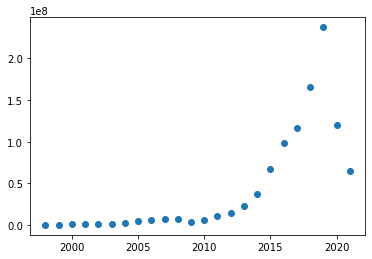

In [32]:
plt.scatter(x, y)

r-squared: 0.569876623744339


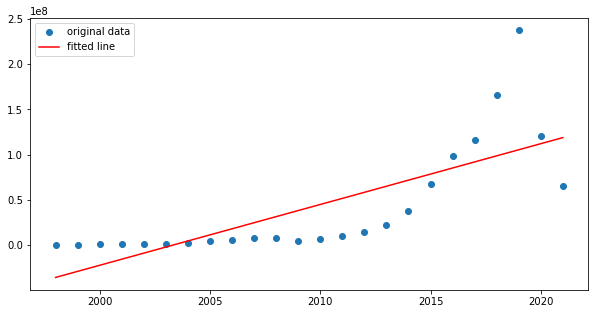

In [33]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared:", r_value**2)
plt.figure(figsize=(10,5))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [85]:
x = df2.Year.values.reshape(-1, 1)
y = df2.Total.values.reshape(-1, 1)
y1 = df2.Tournaments.values.reshape(-1, 1)
y2 = df2.Avgearnings.values.reshape(-1, 1)

In [86]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [87]:
x_min = np.array([[x.min()]])
x_max = np.array([[x.max()]])
print(x_min)
print(x_max)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

[[1998.]]
[[2021.]]
Weight coefficients:  [[6721792.21725652]]
y-axis intercept:  [-1.34658724e+10]


In [88]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)
print(y_min)
print(y_max)
y_min_actual=y.min()
y_max_actual=y.max()
print(y_min_actual)
print(y_max_actual)

[[-35731580.49886513]]
[[1.1886964e+08]]
131700.0
237443072.63999993


In [105]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(x)
r2 =round(r2_score(y, predicted),2)

print(f"R-squared (R2 ): {r2}")
Trend=f"R-squared (R2 ): {r2}"

R-squared (R2 ): 0.57


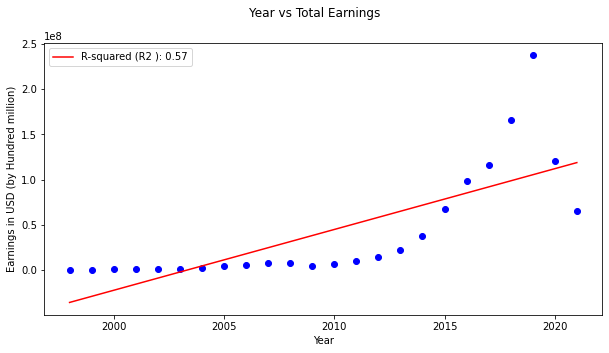

In [106]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Year vs Total Earnings')
plt.xlabel('Year')
plt.ylabel('Earnings in USD (by Hundred million)')
plt.scatter(x, y, c='blue',)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red',label=str(Trend))
plt.legend()
plt.show()


R-squared (R2 ): 0.7311209270238022


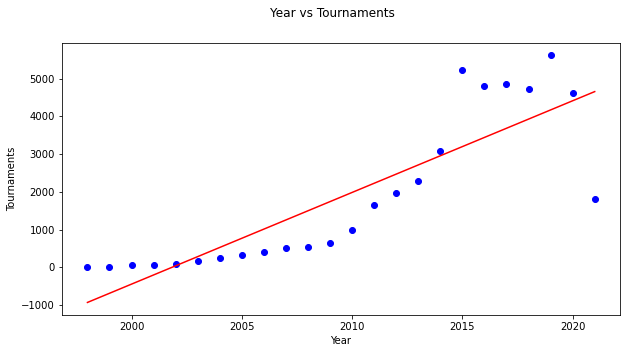

In [102]:
model1 = LinearRegression()
model1.fit(x, y1)
x_min = np.array([[x.min()]])
x_max = np.array([[x.max()]])
y_min1 = model1.predict(x_min)
y_max1 = model1.predict(x_max)
predicted = model1.predict(x)
r2 = r2_score(y1, predicted)

print(f"R-squared (R2 ): {r2}")
fig = plt.figure(figsize=(10,5))
fig.suptitle('Year vs Tournaments')
plt.xlabel('Year')
plt.ylabel('Tournaments')
plt.scatter(x, y1, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min1[0], y_max1[0]], c='red')

R-squared (R2 ): 0.3225420543869597


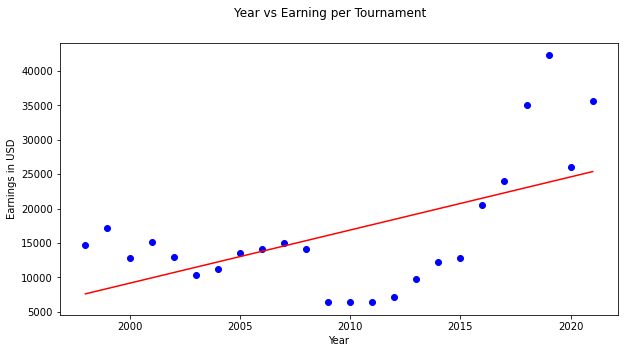

In [98]:
model2 = LinearRegression()
model2.fit(x, y2)
x_min = np.array([[x.min()]])
x_max = np.array([[x.max()]])
y_min2 = model2.predict(x_min)
y_max2 = model2.predict(x_max)
predicted = model2.predict(x)
r2 = r2_score(y2, predicted)

print(f"R-squared (R2 ): {r2}")
fig = plt.figure(figsize=(10,5))
fig.suptitle('Year vs Earning per Tournament')
plt.xlabel('Year')
plt.ylabel('Earnings in USD')
plt.scatter(x, y2, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min2[0], y_max2[0]], c='red')

y = -2002817911.6 * x + 500009.9 * x^2 + 2005595114232.1


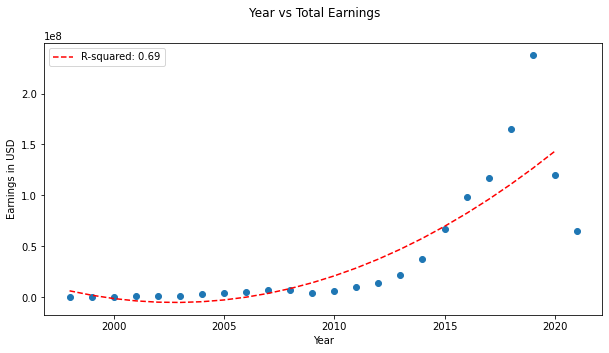

In [119]:

def objective(x, a, b, c):
	return a * x + b * x**2 + c
 


x, y = df2['Year'], df2['Total']

popt, _ = curve_fit(objective, x, y)

a, b, c = popt
print('y = %.1f * x + %.1f * x^2 + %.1f' % (a, b, c))



x_line = arange(min(x), max(x), 1)

y_line = objective(x_line, a, b, c)

residuals = y- objective(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared =round(1 - (ss_res / ss_tot),2)
Trend=f"R-squared: {r_squared}"

fig = plt.figure(figsize=(10,5))
plt.scatter(x, y)
fig.suptitle('Year vs Total Earnings')
plt.xlabel('Year')
plt.ylabel('Earnings in USD')

plt.plot(x_line, y_line, '--', color='red',label=str(Trend))
plt.legend()
plt.show()

In [112]:
x=df2['Year']
y=df2['Total']
#df2['Year'], df2['Total']

In [113]:
residuals = y- objective(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.690024674665547